Parts 1, 2, 3 and 4 were done separately and then combined in this file for user convenience

# 1 - Collecting List of URLs

note: the site loaded dynamically, so it was necessary to imitate user actions using the library __Selenium__

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from lxml import html
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.chrome.options import Options
import time

In [2]:
url_start='https://sutochno.ru/front/searchapp/search?type=region&id=19839&term=%D0%90%D1%80%D1%85%D0%B0%D0%BD%D0%B3%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B0%D1%8F+%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C&SW.lat=65.57589662397677&SW.lng=22.88379796874994&NE.lat=80.18708018216643&NE.lng=81.81446203124993&guests_adults=2'

links = []

In [3]:
options = Options()
options.headless = True
options.add_experimental_option('prefs', {
    'profile.managed_default_content_settings.images': 2,
})

def scroll_page(scroll_amount):
    driver.execute_script(f"window.scrollBy(0, {scroll_amount});")

def get_links_on_page():
    div_elements = driver.find_elements(By.CSS_SELECTOR, 'div.card')
    links = [div.find_element(By.CSS_SELECTOR, 'a.card-content').get_attribute('href') for div in div_elements]
    return links

# Define the number of times to scroll on each page
scroll_times_per_page = 15
scroll_amount = 1000

# Initialize the webdriver
driver = webdriver.Chrome(options=options)

# Open the initial URL
driver.get(url_start)

# Wait for the page to load
time.sleep(10)

# Define the number of pages to navigate
total_pages = 27  # Update this value with the total number of pages

# Loop through each page
for page_number in range(1, total_pages + 1):
    # Scroll a fixed number of times on each page
    for _ in range(scroll_times_per_page):
        scroll_page(scroll_amount)
        time.sleep(2)

    # Collect links from the current page
    all_links = get_links_on_page()

    # Print all the collected links
    for link in all_links:
        print(link)
        links.append(link)
    time.sleep(5)    
    
    # Click on the next page button
    next_page_button = driver.find_element(By.XPATH, f"//li[@class='page-item']/a[@tabindex='0' and text()='{page_number+1}']")
    next_page_button.click()
    
    # Wait for the next page to load
    time.sleep(20)
    
    # Scroll to the top of the page
    driver.execute_script("window.scrollTo(0, 0);")
    
    # Wait for elements to load
    time.sleep(15)

https://sutochno.ru/front/searchapp/detail/1090941?type=region&id=19839&term=%D0%90%D1%80%D1%85%D0%B0%D0%BD%D0%B3%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B0%D1%8F+%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C&SW.lat=69.97871775218731&SW.lng=32.310067499999896&NE.lat=77.98495741710936&NE.lng=72.38819249999989&guests_adults=2
https://sutochno.ru/front/searchapp/detail/1029737?type=region&id=19839&term=%D0%90%D1%80%D1%85%D0%B0%D0%BD%D0%B3%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B0%D1%8F+%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C&SW.lat=69.97871775218731&SW.lng=32.310067499999896&NE.lat=77.98495741710936&NE.lng=72.38819249999989&guests_adults=2
https://sutochno.ru/front/searchapp/detail/1029915?type=region&id=19839&term=%D0%90%D1%80%D1%85%D0%B0%D0%BD%D0%B3%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B0%D1%8F+%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C&SW.lat=69.97871775218731&SW.lng=32.310067499999896&NE.lat=77.98495741710936&NE.lng=72.38819249999989&guests_adults=2
https://sutochno.ru/front/searchapp/detail/1537090?t

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=124.0.6367.63)
Stacktrace:
	GetHandleVerifier [0x00007FF6BBC91502+60802]
	(No symbol) [0x00007FF6BBC0AC02]
	(No symbol) [0x00007FF6BBAC7CE4]
	(No symbol) [0x00007FF6BBA9DFDF]
	(No symbol) [0x00007FF6BBB41E57]
	(No symbol) [0x00007FF6BBB598D1]
	(No symbol) [0x00007FF6BBB3A923]
	(No symbol) [0x00007FF6BBB08FEC]
	(No symbol) [0x00007FF6BBB09C21]
	GetHandleVerifier [0x00007FF6BBF9411D+3217821]
	GetHandleVerifier [0x00007FF6BBFD60B7+3488055]
	GetHandleVerifier [0x00007FF6BBFCF03F+3459263]
	GetHandleVerifier [0x00007FF6BBD4B846+823494]
	(No symbol) [0x00007FF6BBC15F9F]
	(No symbol) [0x00007FF6BBC10EC4]
	(No symbol) [0x00007FF6BBC11052]
	(No symbol) [0x00007FF6BBC018A4]
	BaseThreadInitThunk [0x00007FFCBF157344+20]
	RtlUserThreadStart [0x00007FFCC04826B1+33]


# 2 - Collecting Information about Facilitites Description

In [ ]:
#for testing

# Initialize the webdriver
driver = webdriver.Chrome(options=options)
driver.get('https://sutochno.ru/front/searchapp/detail/988409?guests_adults=2&id=19861&type=region&term=%D0%9C%D1%83%D1%80%D0%BC%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F+%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C&SW.lat=68.9601763342458&SW.lng=33.06122321951291&NE.lat=68.96396950223601&NE.lng=33.07817478048703')

time.sleep(1.1)
try:
    element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "h1.panel-title.tmp-font--big_bold")))
except:
    pass
time.sleep(1.1)

equipment_element = driver.find_element(By.CSS_SELECTOR, 'div.panel-body.often-properties')
equipment_text = equipment_element.text.strip()
equipment_text

In [ ]:
# Read the Excel file
df_urls = pd.read_excel('Суточно РУ URLs.xlsx')
# Extract URLs from a specific column
urls = df_urls['URL'].tolist()

failed_url_list=[]

# Create empty dataframe to store future data
columns = ['URL', 'Name', 'Rating', 'Отзывов', 'К поиску', 'Страна', 'Регион', 'Город', 'ID', 'Адрес',
                   'Тип ИСР', 'Площадь, кв. м', 'вместимость гостей', 'Кол-во кроватей', 'Кол-во спален', 'Кухонная зона',
                   'Этаж', 'Спальные места', 'Кровати', 'Правила', 'Основные Удобства', 'Все дополнительные удобства', 'Минимальный срок проживания']
Characteristics = pd.DataFrame(columns=columns)

options = Options()
options.headless = True
options.add_experimental_option('prefs', {
    'profile.managed_default_content_settings.images': 2,
})

counter=1

# Initialize the webdriver
driver = webdriver.Chrome(options=options)

for i,url in enumerate(urls):
    # Open the initial URL
    driver.get(url)

    # Wait until the element is visible on the page
    time.sleep(1.1)
    try:
        element = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "h1.panel-title.tmp-font--big_bold")))
    except:
        pass
    time.sleep(1.1)

    try:
        button = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "button.button.button_size_md")))
        button.click()
    except:
        pass

    # Create a new temporary list to store the data
    columns = ['URL', 'Name', 'Rating', 'Отзывов', 'К поиску', 'Страна', 'Регион', 'Город', 'ID', 'Адрес',
                   'Тип ИСР', 'Площадь, кв. м', 'вместимость гостей', 'Кол-во кроватей', 'Кол-во спален', 'Кухонная зона',
                   'Этаж', 'Спальные места', 'Кровати', 'Правила', 'Основные Удобства', 'Все дополнительные удобства', 'Минимальный срок проживания']
    df = pd.DataFrame(columns=columns)
        
    # Add url
    df.loc[0, 'URL'] = url
    

    try:
        name_element = driver.find_element(By.CSS_SELECTOR, 'div.detail-top--name.tmp-font--big_bold')
        name = name_element.text.strip()
        df.loc[0, 'Name'] = name
    except:
        pass
    

    try:
        rating_element = driver.find_element(By.CSS_SELECTOR, 'div.rating')
        rating = rating_element.text.strip()
        df.loc[0, 'Rating'] = rating
    except:
        pass
    
    
    try:
        n_reviews_element = driver.find_element(By.CSS_SELECTOR, 'div.review')
        n_reviews = n_reviews_element.text.strip()
        df.loc[0, 'Отзывов'] = n_reviews
    except:
        pass
    
    
    try:
        # Find the <ul> element with the class "path"
        ul_element = driver.find_element(By.CSS_SELECTOR, 'ul.path')
        if ul_element:
            # Find all the <li> elements within the <ul>
            li_elements = ul_element.find_elements(By.TAG_NAME, 'li')
            k=4
            for li in li_elements:
                # Extract and print the text content of each <li> element
                df.iloc[0, k] = li.text.strip()
                k+=1
    except:
        pass
    
    
    try:
        adress_element = driver.find_element(By.CSS_SELECTOR, 'div.address.tmp-font--medium_gray')
        adress = adress_element.text.strip()
        df.loc[0, 'Адрес'] = adress
    except:
        pass

    
    try:
        type_and_sq_m_element = driver.find_element(By.CSS_SELECTOR, 'div.object-data--type.tmp-font--big_bold')
        type_and_sq_m = type_and_sq_m_element.text.strip()
        type_and_sq_m=type_and_sq_m.replace(' ', 'F')
        df.loc[0, 'Тип ИСР'] = type_and_sq_m
    except:
        pass


    try:
        parent_div = driver.find_element(By.CSS_SELECTOR, 'div.object-data--params.tmp-font--medium')
        span_elements = parent_div.find_elements(By.CSS_SELECTOR, 'span[data-v-34e613e7=""]')
        data_list = [span.text.strip() for span in span_elements]
        l=12
        for data in data_list[:len(data_list)]:
            df.iloc[0, l] = data
            l+=1
    except:
        pass


    try:
        div_element = driver.find_element(By.CSS_SELECTOR, 'div.object-data--sleeping-places.tmp-font--average_bold')
        beds = div_element.text.strip()
        df.loc[0, 'Спальные места'] = beds
    except:
        pass


    try:
        div_elements = driver.find_elements(By.CSS_SELECTOR, 'div.object-data--beds.tmp-font--medium')
        # Iterate over the list of elements
        j=18
        for div_element in div_elements:
            # Extract text content from each element
            element_text = div_element.text.strip()  
            # Append the extracted text to row_data list
            df.iloc[0, j] = element_text
            j+=1
    except:
        pass
    
    
    try:
        rules_element = driver.find_element(By.CSS_SELECTOR, 'div.rules--list')
        rules = rules_element.text.strip()
        rules = rules.replace('\n', 'F')
        df.loc[0, 'Правила'] = rules
    except:
        pass    
    

    try:
        amenities_element = driver.find_element(By.CSS_SELECTOR, 'div.panel-body.often-properties')
        amenities = amenities_element.text.strip()
        amenities = amenities.replace('\n', 'F')
        df.loc[0, 'Основные Удобства'] = amenities
    except:
        pass        

    
    try:
        add_amenities_elements = driver.find_elements(By.CSS_SELECTOR, 'div.info-block.w-100.b-info-column > div.pad-block.b-info-column-item')
        add_amenities=""
        for add_amenity_element in add_amenities_elements:
            add_amenities = add_amenities + '(Next block)' + add_amenity_element.text.strip()
        add_amenities = add_amenities.replace('\n', 'F')
        df.loc[0, 'Все дополнительные удобства'] = add_amenities
    except:
        pass    
    

    try:
        div_elements = driver.find_elements(By.CSS_SELECTOR, 'div.rules--top > div.item')
        rules_elements=""
        for div_element in div_elements:
            rules_elements = rules_elements + '(Next block)' + div_element.text.strip()
        rules_elements = rules_elements.replace('\n', 'F')
        df.loc[0, 'Минимальный срок проживания'] = rules_elements
    except:
        pass   
    


    if ((df.iloc[0].isna().sum())<=4): 
        print(f"Ссылка {i} из {len(urls)} успешно скачалась")
    else:
        print(f"Ссылка {i} из {len(urls)} не скачалась")
        failed_url_list.append(url)

    Characteristics = pd.concat([Characteristics, df], ignore_index=True)
    
    '''
    counter+=1
    if counter>40:
        break
    '''

driver.quit()

pd.set_option('display.max_columns', None)
Characteristics

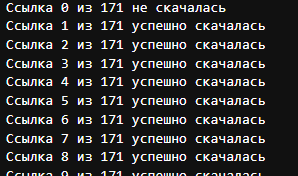

In [ ]:
Characteristics

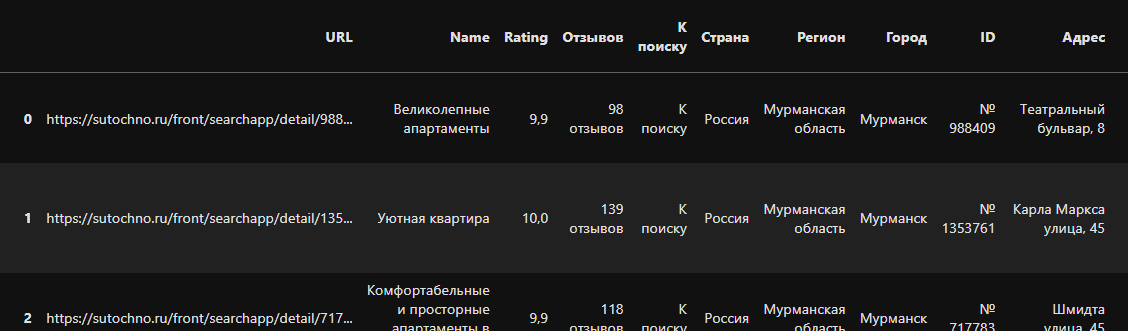

In [ ]:
Characteristics.to_excel('test test.xlsx', index=False)

In [ ]:
df_failed_urls = pd.DataFrame({'Failed URLs': failed_url_list})
df_failed_urls.to_excel("Failed_URLs column.xlsx", index=False)

# 3 - Collecting Prices (for different dates during the year)

In [ ]:
#for testing

# Initialize the webdriver
driver = webdriver.Chrome(options=options)
driver.get('https://sutochno.ru/front/searchapp/detail/988409?guests_adults=2&occupied=2024-04-22;2024-04-28&id=19861&type=region&term=%D0%9C%D1%83%D1%80%D0%BC%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F+%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C&SW.lat=68.9601763342458&SW.lng=33.06122321951291&NE.lat=68.96396950223601&NE.lng=33.07817478048703')

time.sleep(1)
try:
#       lement = WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "h1.panel-title.tmp-font--big_bold")))
    element = WebDriverWait(driver, 2).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "div.aside__wrap")))
except:
    pass
time.sleep(1)

try:
    button = WebDriverWait(driver, 2).until(EC.visibility_of_element_located((By.CSS_SELECTOR, ".toggle-btn")))
    button.click()
    # Wait for the page to load the additional data
    wait = WebDriverWait(driver, 2).until(EC.visibility_of_element_located((By.CSS_SELECTOR, ".price-list")))
except:
    pass

detailed_prices_elements = driver.find_elements(By.CSS_SELECTOR, '.price-item')
detailed_price=""
for detailed_price_element in detailed_prices_elements:
    detailed_price += '(Next block)' + detailed_price_element.text.strip()
#add_amenities = add_amenities.replace('\n', 'F')
detailed_price

'(Next block)4 000 ₽ x 4 суток\nпо сезонной цене\n16 000 ₽(Next block)4 000 ₽ x 2 суток\nпо сезонной цене\n8 000 ₽'

In [ ]:
# Read the Excel file
df_urls = pd.read_excel('Суточно РУ цены URLs karel.xlsx')
# Extract URLs from a specific column
urls = df_urls['URL'].tolist()

def scroll_page(scroll_amount):
    driver.execute_script(f"window.scrollBy(0, {scroll_amount});")


failed_url_list=[]

# Create empty dataframe to store future data
columns = ['URL', 'Кол-во дней и цена', 'Цена описание']
Characteristics = pd.DataFrame(columns=columns)

options = Options()
options.headless = True
options.add_experimental_option('prefs', {
    'profile.managed_default_content_settings.images': 2,
})

counter=1

# Initialize the webdriver
driver = webdriver.Chrome(options=options)

for i,url in enumerate(urls):
    # Open the initial URL
    driver.get(url)
    time.sleep(1)

    for _ in range(15):
        scroll_page(200)
        time.sleep(0.1)
    
    # Wait until the element is visible on the page
    try:
        element = WebDriverWait(driver, 3).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "h1.panel-title.tmp-font--big_bold")))
        element = WebDriverWait(driver, 2).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "div.aside__wrap")))
    except:
        pass
#    time.sleep(0.5)

    try:
        button = WebDriverWait(driver, 1).until(EC.visibility_of_element_located((By.CSS_SELECTOR, ".toggle-btn")))
        button.click()
        # Wait for the page to load the additional data
        wait = WebDriverWait(driver, 1).until(EC.visibility_of_element_located((By.CSS_SELECTOR, ".price-list")))
    except:
        pass
    
    # Create a new temporary list to store the data
    columns = ['URL', 'Кол-во дней и цена', 'Цена описание']
    df = pd.DataFrame(columns=columns)
        
    # Add url
    df.loc[0, 'URL'] = url
    

    try:
        days_and_price_element = driver.find_element(By.CSS_SELECTOR, 'div.view-price__calc')
        days_and_price = days_and_price_element.text.strip()
        days_and_price = days_and_price.replace('\n', '(next line)')
        df.loc[0, 'Кол-во дней и цена'] = days_and_price
    except (NoSuchElementException, TimeoutException):
        try:
            zanyato_element = driver.find_element(By.CSS_SELECTOR, 'div.aside__error')
            zanyato = zanyato_element.text.strip()
            zanyato = zanyato.replace('\n', '(next line)')
            df.loc[0, 'Кол-во дней и цена'] = zanyato
        except:
            pass
    

    try:
        detailed_price_element = driver.find_elements(By.CSS_SELECTOR, '.price-item')
        detailed_price = detailed_price_element.text.strip()
        df.loc[0, '2'] = detailed_price
    except:
        pass
    
    
    try:
        detailed_prices_elements = driver.find_elements(By.CSS_SELECTOR, '.price-item')
        detailed_price=""
        for detailed_price_element in detailed_prices_elements:
            detailed_price += '(Next block)' + detailed_price_element.text.strip()
        detailed_price = detailed_price.replace('\n', '(next line)')
        df.loc[0, 'Цена описание'] = detailed_price
    except:
        pass
    

    if ((df.iloc[0].count().sum()) >= 2): 
        print(f"Ссылка {i} из {len(urls)} успешно скачалась")
    else:
        print(f"Ссылка {i} из {len(urls)} не скачалась")
        failed_url_list.append(url)

    Characteristics = pd.concat([Characteristics, df], ignore_index=True)
    
    
    '''counter+=1
    if counter>50:
        break'''
    

driver.quit()

pd.set_option('display.max_columns', None)
Characteristics

In [ ]:
Characteristics.to_excel('Суточно РУ prices test.xlsx', index=False)

In [ ]:
Characteristics

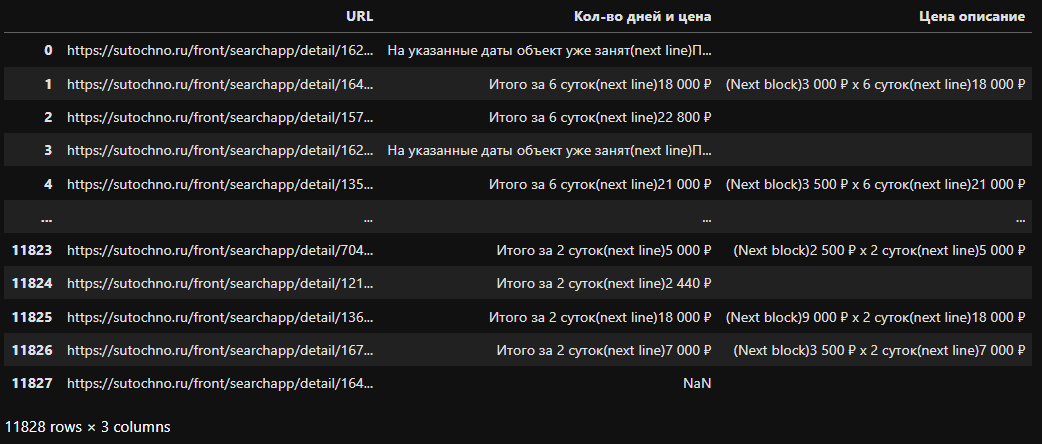

# 4 - (Additional) Collecting Coordinates from Facility Description page

by open new page of Yandex Maps and getting page url (where you can find coordinates)

In [ ]:
#for testing

options = Options()
options.headless = True
options.add_experimental_option('prefs', {
    #'profile.managed_default_content_settings.images': 2,
})

# Initialize the webdriver
driver = webdriver.Chrome(options=options)
driver.get('https://sutochno.ru/front/searchapp/detail/988409?guests_adults=2&id=19861&type=region&term=%D0%9C%D1%83%D1%80%D0%BC%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F+%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C&SW.lat=68.9601763342458&SW.lng=33.06122321951291&NE.lat=68.96396950223601&NE.lng=33.07817478048703')

time.sleep(1)

for _ in range(15):
    driver.execute_script(f"window.scrollBy(0, 200);")
    time.sleep(0.1)

try:
    element = WebDriverWait(driver, 2).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "h1.panel-title.tmp-font--big_bold")))
    element = WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "a.ymaps-2-1-79-copyright__logo")))
except:
    pass
time.sleep(1)
    
# Create a new temporary list to store the data
columns = ['URL', 'Координаты']
df = pd.DataFrame(columns=columns)
        
# Add url
df.loc[0, 'URL'] = url

# Add link
try:
    long_lat_element = driver.find_element(By.CSS_SELECTOR, 'a.ymaps-2-1-79-copyright__logo')
    link = long_lat_element.get_attribute('href')
    df.loc[0, 'Координаты'] = link
except:
    pass

df

In [ ]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from threading import Thread
from queue import Queue

# Function to process URLs with Selenium
def process_urls(urls_chunk, results_queue):
    # Initialize the webdriver
    options = Options()
    options.headless = True
    options.add_experimental_option('prefs', {
        #'profile.managed_default_content_settings.images': 2,
    })
    driver = webdriver.Chrome(options=options)

    # Create an empty DataFrame to store results
    characteristics = pd.DataFrame(columns=['URL', 'Координаты'])

    for i, url in enumerate(urls_chunk):
        try:
            # Open the initial URL
            driver.get(url)

            for _ in range(15):
                driver.execute_script("window.scrollBy(0, 200);")
                time.sleep(0.1)

            # Wait until the element is visible on the page
            time.sleep(1)
            element = WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "h1.panel-title.tmp-font--big_bold")))
            element = WebDriverWait(driver, 2).until(EC.visibility_of_element_located((By.CSS_SELECTOR, ".map-point--name")))
            time.sleep(1)

            # Extract and store the data
            df = pd.DataFrame(columns=['URL', 'Координаты'])
            df.loc[0, 'URL'] = url

            try:
                button = driver.find_element(By.CSS_SELECTOR, 'a.ymaps-2-1-79-copyright__logo')
                button.click()
                time.sleep(1)
                driver.switch_to.window(driver.window_handles[1])
                new_window_url = driver.current_url
                df.loc[0, 'Координаты'] = new_window_url
                driver.close()
                driver.switch_to.window(driver.window_handles[0])
            except:
                pass

            if df.iloc[0].count().sum() >= 2:
                print(f"Ссылка {i} из {len(urls_chunk)} успешно скачалась")
            else:
                print(f"Ссылка {i} из {len(urls_chunk)} не скачалась")

            # Append the result to the DataFrame
            characteristics = characteristics.append(df, ignore_index=True)
            results_queue.put(df)  # Put the result DataFrame into the queue

        except Exception as e:
            print(f"Ошибка при обработке ссылки {i}:", str(e))

    driver.quit()

    return characteristics


# Read the Excel file
df_urls = pd.read_excel('Суточно РУ ссылки для координат.xlsx')
urls = df_urls['URL'].tolist()

# Split the URLs into chunks for parallel processing
chunk_size = len(urls) // 3  # Divide the URLs into three roughly equal chunks
url_chunks = [urls[i:i + chunk_size] for i in range(0, len(urls), chunk_size)]

# Create a queue to store the results
results_queue = Queue()

# Create and start threads for each chunk of URLs
threads = []
for chunk in url_chunks:
    thread = Thread(target=process_urls, args=(chunk, results_queue))
    threads.append(thread)
    thread.start()

# Create an empty DataFrame to store results
Characteristics = pd.DataFrame(columns=['URL', 'Координаты'])

# Retrieve results from the queue and concatenate them into a single DataFrame
while not all(not thread.is_alive() for thread in threads):
    while not results_queue.empty():
        Characteristics = pd.concat([Characteristics, results_queue.get()], ignore_index=True)
    time.sleep(1)  # Wait for threads to finish processing

# Print the final DataFrame
print(Characteristics)

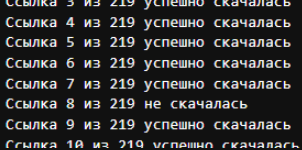

In [ ]:
Characteristics

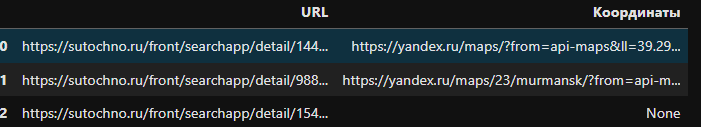